In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


In [ ]:
x_train = x_train[:10000]
y_train = y_train[:10000]

x_test  = x_test[:2000]
y_test  = y_test[:2000]


In [ ]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]


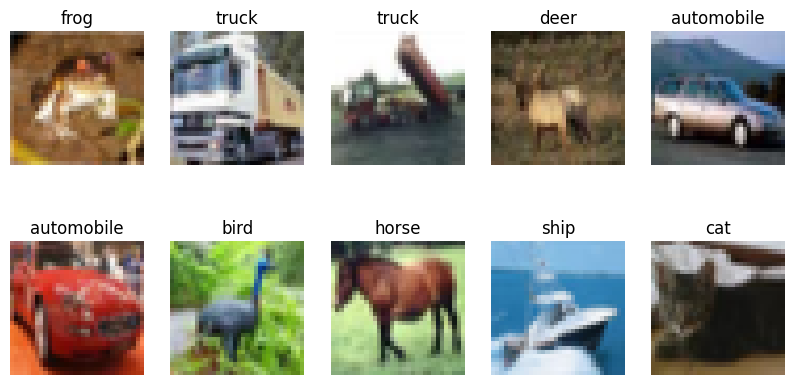

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.1967 - loss: 2.1373 - val_accuracy: 0.3520 - val_loss: 1.7769
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.4190 - loss: 1.6250 - val_accuracy: 0.4580 - val_loss: 1.4959
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.4684 - loss: 1.4456 - val_accuracy: 0.4590 - val_loss: 1.4580
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.5146 - loss: 1.3595 - val_accuracy: 0.4865 - val_loss: 1.4004
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.5443 - loss: 1.2884 - val_accuracy: 0.5200 - val_loss: 1.3160
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.5743 - loss: 1.1995 - val_accuracy: 0.5405 - val_loss: 1.2867
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.6001 - loss: 1.1164 - val_accuracy: 0.5635 - val_loss: 1.2417
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.6284 - loss: 1.0589 - 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}  ({test_acc*100:.2f}%)")



Test accuracy: 0.5665  (56.65%)


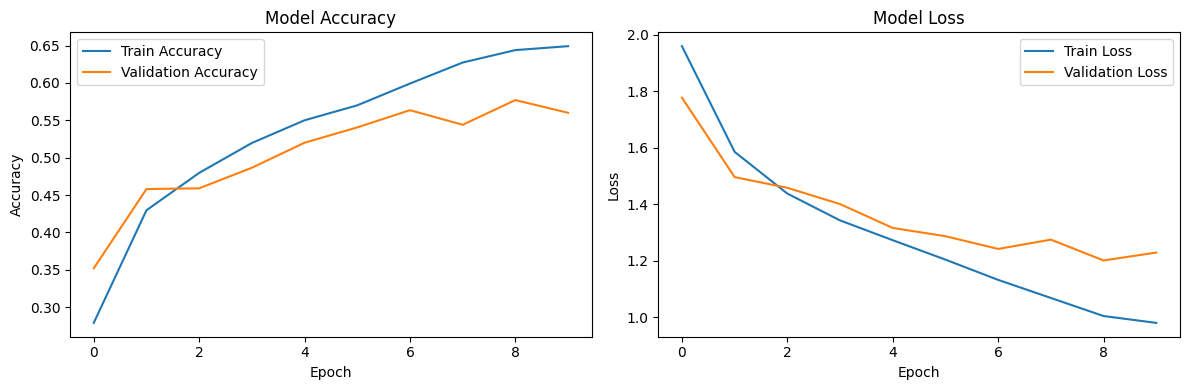

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


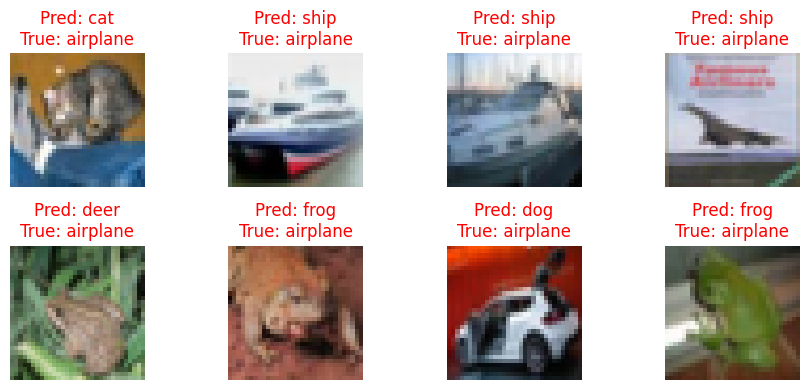

In [ ]:
num_images = 8
predictions = model.predict(x_test[:num_images])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:num_images], axis=1)

plt.figure(figsize=(9, 4))
for i in range(num_images):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color=("green" if predicted_classes[i] == true_classes[i] else "red"))
    plt.axis('off')
plt.tight_layout()
plt.show()
# Optional: Save the model
# model.save("basic_cifar10_cnn.h5")
